# In this file LR is used for both balanced and imbalanced dataset.

* resource :https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/


### The sensitivity with balanced class is improved to a great extent

In [3]:

#Import the liberaries 
import pandas as pd
import numpy as np
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import roc_curve,confusion_matrix , accuracy_score, classification_report , roc_auc_score, f1_score,precision_score, recall_score
from plot_metric.functions import BinaryClassification
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.preprocessing import PowerTransformer

# Read the data after cleaning and pre-processing 

In [4]:
data_final=pd.read_hdf("data_final.h5", key='data_final')

In [5]:
# these are the features that we have finilized to give the model 

feature_list_for_training=[
'spec_pat_num_age',
# Gender-male
'patient_gender_M',
# Specimen Collection location
'collected_in_ed', 'collected_in_hospital', 'collected_in_dsl',
# Resident During Collection
'dsl_resident_during_collection',
# Symptomatic During Collection
'symptomatic_during_collection_U', 'symptomatic_during_collection_Y',
# Result of the covid test
'interp_result_Positive',
# Specimen year-month collection
'y_m__2020-10',
'y_m__2020-11', 'y_m__2020-12', 'y_m__2020-3', 'y_m__2020-4',
'y_m__2020-5', 'y_m__2021-3', 'y_m__2020-7', 'y_m__2020-8',
'y_m__2020-9', 'y_m__2021-1', 'y_m__2021-2', 
# Num of Elixhauser 
'chf_2_years_full_1', 'htn_unc_2_years_full_1',
'cancer_mets_2_years_full_1', 'fluid_elec_dis_2_years_full_1',
'card_arrh_2_years_full_1', 'valv_dis_2_years_full_1',
'pcd_2_years_full_1', 'pvd_2_years_full_1', 'htn_c_2_years_full_1',
'paral_2_years_full_1', 'oth_neur_dis_2_years_full_1',
'cpd_2_years_full_1', 'diab_2_years_full_1',
'hypothyroidism_2_years_full_1', 'ren_fail_2_years_full_1',
'liver_dis_2_years_full_1', 'pep_ulc_exc_bld_2_years_full_1',
'aids_hiv_2_years_full_1', 'lymph_2_years_full_1',
'tumour_no_mets_2_years_full_1', 'rheum_col_vasc_dis_2_years_full_1',
'coag_2_years_full_1', 'obes_2_years_full_1', 'wt_loss_2_years_full_1',
'anemia_2_years_full_1', 'alc_abuse_2_years_full_1',
'drug_abuse_2_years_full_1', 'psych_2_years_full_1',
'depress_2_years_full_1',
#Num of Admits for 1 year
'num_admits_1_year', 'num_scu_admits_1_year',
#Num Procedures for 1 year
'num_procs_dad_1_year', 'num_procs_nacrs_1_year',
]


In [6]:
def Find_Optimal_Cutoff(target, predicted):    
    '''Find data-driven cut-off for classification
    
    Cut-off is determied using Youden's index defined as sensitivity + specificity - 1.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels.
        
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive class,
        confidence values, or non-thresholded measure of decisions (as returned by
        “decision_function” on some classifiers).
        
    References
    ----------
    
    Ewald, B. (2006). Post hoc choice of cut points introduced bias to diagnostic research.
    Journal of clinical epidemiology, 59(8), 798-801.
    
    Steyerberg, E.W., Van Calster, B., & Pencina, M.J. (2011). Performance measures for
    prediction models and markers: evaluation of predictions and classifications.
    Revista Espanola de Cardiologia (English Edition), 64(9), 788-794.
    
    Jiménez-Valverde, A., & Lobo, J.M. (2007). Threshold criteria for conversion of probability
    of species presence to either–or presence–absence. Acta oecologica, 31(3), 361-369.
    '''
    fpr, tpr, thresholds = roc_curve(target, predicted)
    idx = np.argmax(tpr - fpr)
    return thresholds[idx]

# trian the model by Imbalanced data 

In [7]:
# separate the features for training 
X=data_final[feature_list_for_training]
# separate the labels for the training 
y=data_final['died_within_60_days']

# add the constant to the x features
X=sm.add_constant(X)
# split the dataset into train and tes set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

######################################

print("### Classes percentage in the training as there are imbalanceness:") 
print(y_train.value_counts()*100/len(y_train))

# fit the model
log_reg=sm.Logit(y_train,X_train ).fit()

# after fitting the model, we need to test the model on the x_test (y_hat are the predicted probabilities)
yhat = log_reg.predict(X_test)
# recieve the labels from the y_hat for the classification

/Users/fuzzysha/software/miniconda3/envs/hproj/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Classes percentage in the training as there are imbalanceness:
0    89.857528
1    10.142472
Name: died_within_60_days, dtype: float64
Optimization terminated successfully.
         Current function value: 0.273800
         Iterations 8


In [8]:
# Find optimal probability threshold by using the yhat as a continuous measure
threshold = Find_Optimal_Cutoff(y_test, yhat)
print(threshold)

# Find prediction to the dataframe applying threshold :
# choose the cutoff so that the outcome is more balanced, using either the youden index 
prediction = pd.Series(yhat).map(lambda x: 1 if x > threshold else 0)

0.08317237543971503


Confusion Matrix : 
 [[1509  794]
 [  59  196]]
Test accuracy =  0.6665363565285379
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      2303
           1       0.20      0.77      0.31       255

    accuracy                           0.67      2558
   macro avg       0.58      0.71      0.55      2558
weighted avg       0.89      0.67      0.73      2558

F1 Score: 0.314859437751004
AUC: 0.71%


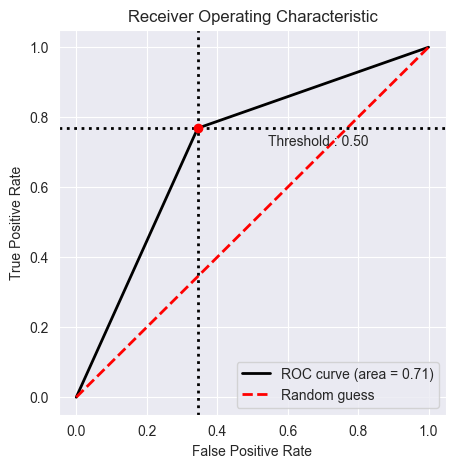

In [9]:
# confusion matrix for the test dataset
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

print("F1 Score: {}".format(f1_score(y_test, prediction)))

roc_auc = roc_auc_score(y_test, prediction)
print('AUC: %.2f' % roc_auc + "%")



# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction, labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

# summary of the model trained by imbalanced classes 

In [10]:
# print summary of the model trained with Imbalanced data
print(log_reg.summary())

                            Logit Regression Results                           
Dep. Variable:     died_within_60_days   No. Observations:                23022
Model:                           Logit   Df Residuals:                    22967
Method:                            MLE   Df Model:                           54
Date:                 Thu, 26 Jan 2023   Pseudo R-squ.:                  0.1658
Time:                         14:14:52   Log-Likelihood:                -6303.4
converged:                        True   LL-Null:                       -7555.9
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -7.3378      0.251    -29.222      0.000      -7.830      -6.846
spec_pat_num_age                      0.0465      0.00

# train the model by balanced  classes 

In [11]:
# only balnce the classes with out normalization 

X=data_final[feature_list_for_training]


X=sm.add_constant(X)
#split to test and training 
# x_train : features for the training the model
# x_test :features for testing the model 

# y_train: the labels for the training the model
# y_test: the labels for the testing  the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


#only oversample for the trian sets

scaler_PT = PowerTransformer() 
over_sampler = RandomOverSampler(random_state=42)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

######################################

print("### Classes percentage in the training as there are no longer any imbalanceness:") 
print(y_train.value_counts()*100/len(y_train))


# fit the model
log_reg=sm.Logit(y_train,X_train ).fit()

# after fitting the model, we need to test the model on the x_test (y_hat are the predicted probabilities)
yhat = log_reg.predict(X_test)
# recieve the labels from the y_hat for the classification


### Classes percentage in the training as there are no longer any imbalanceness:
0    50.0
1    50.0
Name: died_within_60_days, dtype: float64


/Users/fuzzysha/software/miniconda3/envs/hproj/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.544549
         Iterations 6


In [12]:
# Find optimal probability threshold by using the yhat as a continuous measure
threshold = Find_Optimal_Cutoff(y_test, yhat)
print(threshold)
# Find prediction to the dataframe applying threshold :
# choose the cutoff so that the outcome is more balanced, using either the youden index 
prediction = pd.Series(yhat).map(lambda x: 1 if x > threshold else 0)

0.42626588779865554


Confusion Matrix : 
 [[1486  817]
 [  55  200]]
Test accuracy =  0.6591086786551994
              precision    recall  f1-score   support

           0       0.96      0.65      0.77      2303
           1       0.20      0.78      0.31       255

    accuracy                           0.66      2558
   macro avg       0.58      0.71      0.54      2558
weighted avg       0.89      0.66      0.73      2558

F1 Score: 0.31446540880503143
AUC: 0.71%


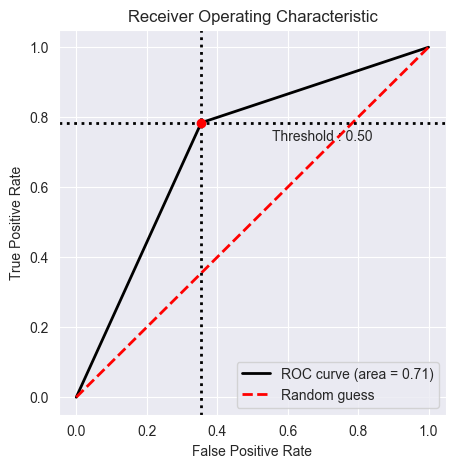

In [13]:


# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

print("F1 Score: {}".format(f1_score(y_test, prediction)))

roc_auc = roc_auc_score(y_test, prediction)
print('AUC: %.2f' % roc_auc + "%")



# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction, labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

# summary of the model trained by balanced classes 

In [14]:
# print summary of the model trained with balanced data
print(log_reg.summary())

                            Logit Regression Results                           
Dep. Variable:     died_within_60_days   No. Observations:                41374
Model:                           Logit   Df Residuals:                    41319
Method:                            MLE   Df Model:                           54
Date:                 Thu, 26 Jan 2023   Pseudo R-squ.:                  0.2144
Time:                         14:14:53   Log-Likelihood:                -22530.
converged:                        True   LL-Null:                       -28678.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.1568      0.114    -45.066      0.000      -5.381      -4.933
spec_pat_num_age                      0.0461      0.00

# train the model by normalization and balanced  classes 
### 1-Random over sampling method

In [15]:
# only balnce the classes with out normalization 
X=data_final[feature_list_for_training]

scaler_PT = PowerTransformer() 
# normalize the x features 
X = scaler_PT.fit_transform(X)
X=sm.add_constant(X)

#split to test and training 
# x_train : features for the training the model
# x_test :features for testing the model 

# y_train: the labels for the training the model
# y_test: the labels for the testing  the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


#only oversample for the trian sets

over_sampler = RandomOverSampler(random_state=42)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

######################################

print("### Classes percentage in the training as there are no longer any imbalanceness:") 
print(y_train.value_counts()*100/len(y_train))


# fit the model
log_reg=sm.Logit(y_train,X_train ).fit()

# after fitting the model, we need to test the model on the x_test (y_hat are the predicted probabilities)
yhat = log_reg.predict(X_test)
# recieve the labels from the y_hat for the classification

### Classes percentage in the training as there are no longer any imbalanceness:
0    50.0
1    50.0
Name: died_within_60_days, dtype: float64
Optimization terminated successfully.
         Current function value: 0.545353
         Iterations 6


In [16]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test, yhat)
print(threshold)
# [0.31762762459360921]
# Find prediction to the dataframe applying threshold
prediction = pd.Series(yhat).map(lambda x: 1 if x > threshold else 0)

0.42264550434893283


Confusion Matrix : 
 [[1479  824]
 [  55  200]]
Test accuracy =  0.6563721657544958
              precision    recall  f1-score   support

           0       0.96      0.64      0.77      2303
           1       0.20      0.78      0.31       255

    accuracy                           0.66      2558
   macro avg       0.58      0.71      0.54      2558
weighted avg       0.89      0.66      0.73      2558

F1 Score: 0.31274433150899145
AUC: 0.71%


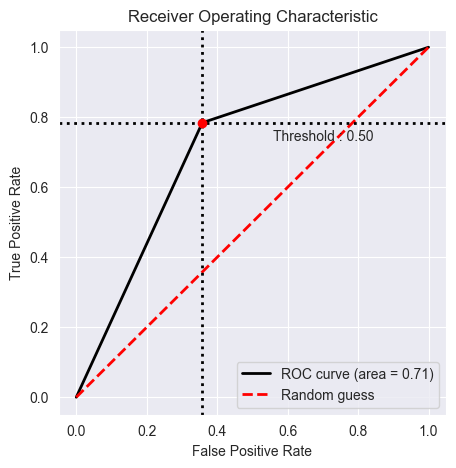

In [17]:



# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

print("F1 Score: {}".format(f1_score(y_test, prediction)))

roc_auc = roc_auc_score(y_test, prediction)
print('AUC: %.2f' % roc_auc + "%")



# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction, labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

### 2-SMOTE Method

In [20]:
# only balnce the classes with out normalization 
X=data_final[feature_list_for_training]

scaler_PT = PowerTransformer() 
# normalize the x features 
X = scaler_PT.fit_transform(X)
X=sm.add_constant(X)

#split to test and training 
# x_train : features for the training the model
# x_test :features for testing the model 

# y_train: the labels for the training the model
# y_test: the labels for the testing  the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


#only oversample for the trian sets

smote_over_sampler = SMOTE(random_state=42)
X_train, y_train = smote_over_sampler.fit_resample(X_train, y_train)

######################################

print("### Classes percentage in the training as there are no longer any imbalanceness:") 
print(y_train.value_counts()*100/len(y_train))


# fit the model
log_reg=sm.Logit(y_train,X_train ).fit()

# after fitting the model, we need to test the model on the x_test (y_hat are the predicted probabilities)
yhat = log_reg.predict(X_test)
# recieve the labels from the y_hat for the classification

### Classes percentage in the training as there are no longer any imbalanceness:
0    50.0
1    50.0
Name: died_within_60_days, dtype: float64
Optimization terminated successfully.
         Current function value: 0.540758
         Iterations 6


In [21]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test, yhat)
print(threshold)
# [0.31762762459360921]
# Find prediction to the dataframe applying threshold
prediction = pd.Series(yhat).map(lambda x: 1 if x > threshold else 0)

0.46227295774799937


Confusion Matrix : 
 [[1579  724]
 [  65  190]]
Test accuracy =  0.6915559030492572
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      2303
           1       0.21      0.75      0.33       255

    accuracy                           0.69      2558
   macro avg       0.58      0.72      0.56      2558
weighted avg       0.89      0.69      0.75      2558

F1 Score: 0.32506415739948674
AUC: 0.72%


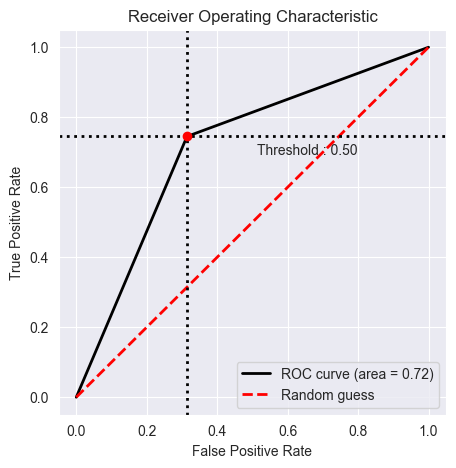

In [22]:



# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

print("F1 Score: {}".format(f1_score(y_test, prediction)))

roc_auc = roc_auc_score(y_test, prediction)
print('AUC: %.2f' % roc_auc + "%")



# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction, labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()